# The Sparks Foundation
## Graduate Rotational Program (GRIP) May 2021 Batch
## Data Science and Business Analytics
## Name - Sameer Arora

## Task-1 : To predict the percentage of marks of a student based on the number of hours studied

## Notebook Imports

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Data

In [19]:
#Importing csv file using pandas
data = pd.read_csv('data.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [20]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [21]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

## Visualising Data 
### By using Scatter plots and histogram charts

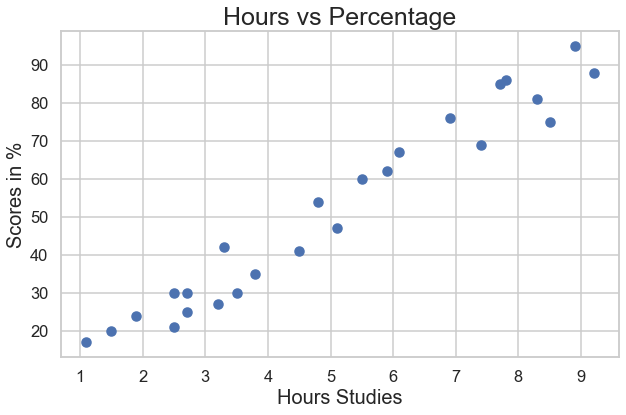

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y)
plt.title('Hours vs Percentage', fontsize= 25)
plt.xlabel('Hours Studies', fontsize= 20)
plt.ylabel('Scores in %', fontsize= 20)

plt.show()

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


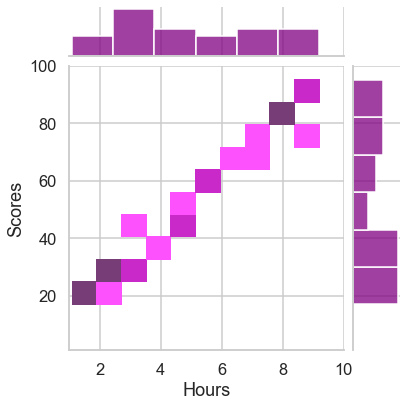

In [23]:
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.jointplot(data['Hours'], data['Scores'],kind= 'hist', color='purple' , bins= 10, xlim=(1,10), ylim=(1, 100))
plt.show()

## Training and test dataset split

In [24]:
#Spliting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10) 

In [25]:
#Training our model
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Testing data r-squared:', regr.score(X_test, y_test))

Training data r-squared: 0.95807022445042
Testing data r-squared: 0.6683995499740194


## Plotting Regression line

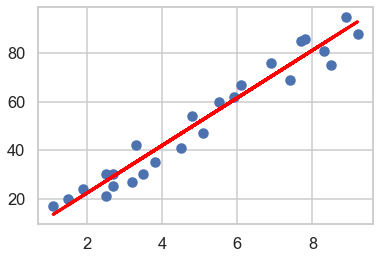

In [26]:
plt.scatter(X, Y)
plt.plot(X, regr.predict(X), color='red', linewidth=3)
plt.show()

## Testing Data

In [27]:
#comparing actual data with trained dataset
Test_prediction = np.around(regr.predict(X_test), 2)
Prediction = pd.DataFrame({'Actual_Data' : y_test, 'Predicted_Data': Test_prediction})
Prediction

,Actual_Data,Predicted_Data
0,20,17.37
1,47,52.70
2,42,35.04
3,27,34.06
4,41,46.81


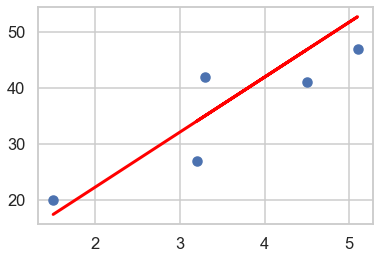

In [28]:
#Scatter plot
plt.scatter(X_test, y_test)
plt.plot(X_test, regr.predict(X_test), color='red', linewidth=3)
plt.show()

## Evaluating the model
### R-squared is a measure of proportion of variation in the outcome that is explained by the predictor variables. the higher the r-square the better is the model.
### BIC (or Bayesian information criteria) is a variant of AIC which measures the accuracy of the model with a stronger penalty for including additional variables to the model.

In [29]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

print("r-squared value is :", results.rsquared)
print("bic value is :", results.bic)

r-squared value is : 0.95807022445042
bic value is : 129.17830843663856


### Mean Squared error and Root mean squared error
#### Root Mean Squared Error (RMSE), which measures the average error performed by the model in predicting the outcome for an observation. The lower the RMSE, the better the model.

In [30]:
mse = results.mse_resid
print("MSE is", mse)
print("RMSE is", np.sqrt(mse))

MSE is 30.778784685366734
RMSE is 5.54786307377595


In [31]:
hours = np.array(9.25).reshape(1,1)
pred = np.around(regr.predict(hours), 2)

In [32]:
print(pred)

[93.43]


## Valuation Tool

In [33]:
def Marks_scored(hours):
    hours = np.array(hours).reshape(1,-1)
    return regr.predict(hours)

### Valuating model at hours - 9.25

In [34]:
print("Marks in % scored at hours-9.25 is:", Marks_scored(9.25))

Marks in % scored at hours-9.25 is: [93.43229054]
